In [1]:
from hkvtools.ET import ET
%matplotlib inline

In [2]:
# read locations file
locations_file = r'D:\Projects\Pr\2811.20.02\locations.csv'
# read file containing data values
data_file = r'D:\Projects\Pr\2811.20.02\KNMI_20170719_hourly.txt'

In [3]:
# set Locations file in the module
# is used for joining on coordinates, currently necessary, but should become optional
ET.data.KNMI.setLocations(locations_file)

In [4]:
# set data file with hourly timeseries from KNMI
# currently need to check manually in texteditor how many rows to skip in the input file
# row number of this line -->   # 
#                               # STN,YYYYMMDD,   HH,   DD,   FH,   etc
#                               # 
# computeET is set to false and is done in next step, can also be combined
ET.data.KNMI.setHourlyTimeSeries(data_file, skiprows=32, computeET=False)

c:\python35\lib\site-packages\IPython\core\interactiveshell.py:2827: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


minimum dag temperatuur (K)
relatieve vochtigheid (-)
maximum dag temperatuur (°C)
dagsom globale straling (W/m2)
bedekkingsgraad van de bewolking (-)
luchtdruk (kPa) op hoogte z0
maximum dag temperatuur (K)
minimum dag temperatuur (°C)
gemiddelde dag temperatuur (°C)
gemiddelde dag temperatuur (K)



In [5]:
# compute ET estimates based on De Bruin-Keijman methode en Makkink methode
# gewasfactor of open water is 1.26
# average water depth is currently set to 3 (meters)
# one function is little slow as it's depending on a lookup table, if necessary can be improved
ET.data.KNMI.computeETtimeseries(ET.data.KNMI.getHourlyTimeSeries)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
c:\python35\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
# set the computed ET pandas DataFrame as a new variable
df = ET.data.KNMI.getETdataframe

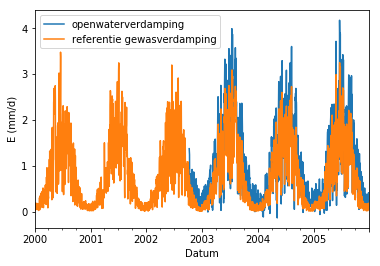

In [7]:
# column 'openwaterverdamping' is based on De Bruin-Keijman method
# column 'referentie gewasverdamping' is based on Makkink method
# STN 269 is the code for station Lelystad
ax = df[df['STN']=='269'][['openwaterverdamping','referentie gewasverdamping']].plot(legend=True)
ax.set_ylabel(ET.variabelen['openwaterverdamping']['symbool']+' ('+ET.variabelen['openwaterverdamping']['eenheid']+')')

In [8]:
# dataframe 'df', includes all variables used for computation of ET estimates for in-depth evaluation purposes
df.head()

,STN,netto langgolvige straling station term3,partiele dampdruk,luchtdruk,afgeleide van e_sat bij luchttemperatuur T,netto langgolvige straling station,nettostraling station,maximum dagtemperatuur in Kelvin,netto langgolvige straling station term1,albedo,...,inkomende langgolvige straling,openwaterverdamping,minimum dagtemperatuur in Kelvin,psychrometerconstante,netto langgolvige straling station term2,verdampingswarmte van water,uitgaande langgolvige straling,gemiddelde dagtemperatuur in graden,bodemwarmtestroom,netto langgolvige straling station MJm2d1
Datum,,,,,,,,,,,,,,,,,,,,,
2000-01-01,269,NaN,0.799628,102.355000,0.012781,NaN,NaN,281.25,28.017282,0.0,...,0.0,NaN,274.25,0.067018,0.214809,2.489465,0.0,4.887500,-9.408596,NaN
2000-01-02,269,NaN,0.885410,102.614167,0.013896,NaN,NaN,281.25,28.709494,0.0,...,0.0,NaN,277.75,0.067311,0.208265,2.484902,0.0,6.820833,-9.408596,NaN
2000-01-03,269,NaN,0.913358,101.934583,0.014702,NaN,NaN,282.55,29.125056,0.0,...,0.0,NaN,278.45,0.066956,0.206202,2.481539,0.0,8.245833,-9.408596,NaN
2000-01-04,269,NaN,0.818622,101.373750,0.013484,NaN,NaN,281.85,28.416973,0.0,...,0.0,NaN,275.65,0.066421,0.213331,2.487744,0.0,5.616667,-9.408596,NaN
2000-01-05,269,NaN,0.714690,101.771667,0.012310,NaN,NaN,280.05,27.787176,0.0,...,0.0,NaN,274.35,0.066591,0.221645,2.491137,0.0,4.179167,-9.408596,NaN


In [9]:
len(df.columns)

34